<a href="https://colab.research.google.com/github/Iamthulasiraman/Detecting-Child-_Or-Adult/blob/main/Child_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **importing dataset**

In [ ]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/die9origephit/children-vs-adults-images/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamthulasiraman
Your Kaggle Key: ··········


100%|██████████| 27.7M/27.7M [00:00<00:00, 68.9MB/s]


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

### **Train Data**

In [ ]:
path_c = "/content/children-vs-adults-images/train/children"
files = os.listdir(path_c)

path_a = "/content/children-vs-adults-images/train/adults"
files_n = os.listdir(path_a)

In [ ]:
imge_c   = []
data_c   = []
for i in tqdm(files):
    tot = path_c +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    imge_c.append(np.array(image))
    data_c.append(1)

imge_n   = []
data_n   = []
for i in tqdm(files_n):
    tot = path_a +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    imge_n.append(np.array(image))
    data_n.append(0)

100%|██████████| 340/340 [00:01<00:00, 270.49it/s]


In [ ]:
imge_train= imge_c + imge_n

In [ ]:
len(imge_train)

680

In [ ]:
data_train = data_c + data_n

array([[[ 75,  15,  14],
        [ 69,   8,   5],
        [ 71,  10,   8],
        ...,
        [105,  91,  81],
        [100,  82,  68],
        [ 87,  60,  46]],

       [[ 70,  11,  10],
        [ 69,   9,   6],
        [ 73,  12,  10],
        ...,
        [102,  88,  78],
        [ 97,  79,  65],
        [ 87,  60,  46]],

       [[ 66,   8,   6],
        [ 69,  10,   6],
        [ 73,  12,  11],
        ...,
        [ 99,  85,  75],
        [ 93,  74,  60],
        [ 87,  59,  45]],

       ...,

       [[ 21,  20,  18],
        [ 21,  20,  18],
        [ 21,  19,  19],
        ...,
        [ 40,  58,  74],
        [ 39,  56,  72],
        [ 41,  57,  73]],

       [[ 21,  21,  20],
        [ 22,  21,  20],
        [ 21,  20,  21],
        ...,
        [ 41,  57,  73],
        [ 39,  56,  72],
        [ 40,  56,  72]],

       [[ 21,  23,  22],
        [ 21,  22,  23],
        [ 20,  21,  23],
        ...,
        [ 36,  53,  69],
        [ 35,  52,  68],
        [ 35,  51,  67]]], dtype=uint8)
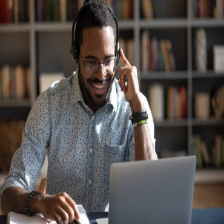

In [ ]:
imge_train[500]

In [ ]:
imge_trains = []
for i in imge_train:
  imge_trains.append(i/225)

### **Validation Data**

In [ ]:
path_c_t = "/content/children-vs-adults-images/test/children"
files = os.listdir(path_c_t)

path_a_t = "/content/children-vs-adults-images/test/adults"
files_n = os.listdir(path_a_t)

In [ ]:
imge_c_t   = []
data_c_t   = []
for i in tqdm(files):
    tot = path_c_t +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    imge_c_t.append(np.array(image))
    data_c_t.append(1)

imge_n_t   = []
data_n_t   = []
for i in tqdm(files_n):
    tot = path_a_t +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    imge_n_t.append(np.array(image))
    data_n_t.append(0)

100%|██████████| 60/60 [00:00<00:00, 526.10it/s]


In [ ]:
imge_test = imge_c_t + imge_n_t

In [ ]:
len(imge_test)

120

In [ ]:
data_test = data_c_t + data_n_t

array([[[ 89, 119,  48],
        [163, 186, 145],
        [176, 190, 170],
        ...,
        [233, 238, 244],
        [230, 237, 243],
        [228, 237, 244]],

       [[124, 154,  70],
        [156, 178, 118],
        [198, 212, 185],
        ...,
        [232, 238, 245],
        [231, 238, 243],
        [228, 237, 244]],

       [[173, 197, 119],
        [186, 208, 136],
        [204, 217, 181],
        ...,
        [233, 240, 246],
        [231, 238, 244],
        [228, 237, 244]],

       ...,

       [[ 39,  31,  16],
        [ 84,  69,  36],
        [ 35,  24,   8],
        ...,
        [105,  50,  20],
        [ 45,   8,   0],
        [ 45,  12,   6]],

       [[ 39,  31,  13],
        [ 84,  69,  43],
        [ 42,  33,  19],
        ...,
        [ 95,  43,  13],
        [ 39,   6,   0],
        [ 42,  12,   6]],

       [[ 11,   5,   1],
        [ 40,  31,  13],
        [ 22,  17,   5],
        ...,
        [ 95,  43,  13],
        [ 40,   7,   0],
        [ 41,  12,   7]]], dtype=uint8)
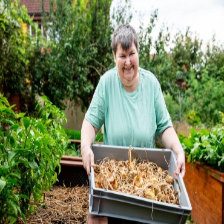

In [ ]:
imge_test[100]

In [ ]:
imge_tests = []
for i in imge_test:
  imge_tests.append(i/225)

### **Splitting Data**

In [ ]:
X_train =np.array(imge_trains)
Y_train =np.array(data_train)
X_test  =np.array(imge_tests)
Y_test  =np.array(data_test)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(680, 224, 224, 3)
(680,)
(120, 224, 224, 3)
(120,)


### **Defining Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add

In [ ]:
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

### **Deining Checkpoint**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("Child_or_NOT_model.h5", save_best_only=True)
early_stopping = callbacks.EarlyStopping(monitor='val_loss',patience=75,restore_best_weights=True )

### **Fitting the Model**

In [ ]:
history = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=50,
    callbacks=[checkpoint, early_stopping])

Epoch 1/50
10/22 [============>.................] - ETA: 29s - loss: 1.4489 - accuracy: 0.4875

KeyboardInterrupt: 

### **Evaluating the model**

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 1s 142ms/step - loss: 2.1894 - accuracy: 0.6667


[2.1894469261169434, 0.6666666865348816]

### **Make predictions using the model**

In [ ]:
pred = model.predict(X_test)

4/4 [==============================] - 1s 139ms/step


In [ ]:
i=0
Pred_l=[]
while(i<len(pred)):
  Pred_l.append(int(np.round(pred[i])))
  i=i+1

<ipython-input-34-efaf433d1ce0>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[i])))


### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test, Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        60
           1       0.67      0.65      0.66        60

    accuracy                           0.67       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.67      0.67       120



### **Testing the model**

In [ ]:
def test_image(ind, imge_train,imge_trains, Model):
  plt.imshow(imge_train[ind])
  image_test=imge_trains[ind]
  pred_l=Model.predict(np.array([image_test]))
  b_n=['NOT_CHILD','CHILD']
  output=int(np.round(pred_l))
  print("Predicted  is "+ b_n[output])

1/1 [==============================] - 0s 49ms/step
Predicted  is CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


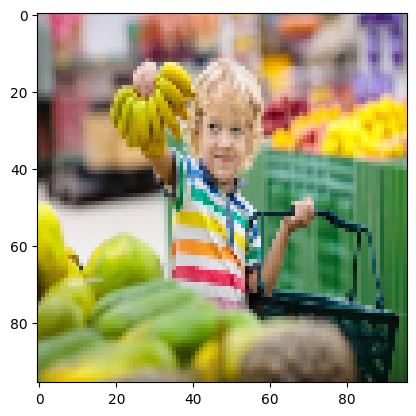

In [ ]:
test_image(9, imge_train,imge_trains,model)

1/1 [==============================] - 0s 63ms/step
Predicted  is CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


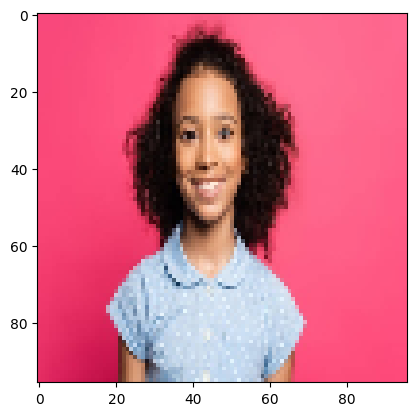

In [ ]:
test_image(100, imge_train,imge_trains,model)

1/1 [==============================] - 0s 46ms/step
Predicted  is CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


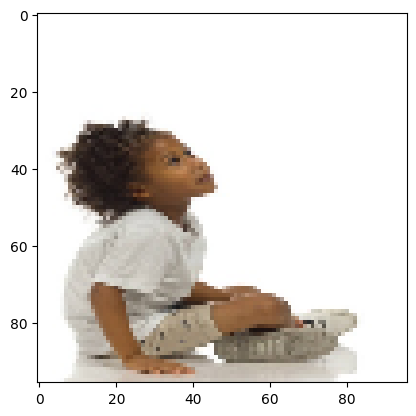

In [ ]:
test_image(300, imge_train,imge_trains,model)

1/1 [==============================] - 0s 33ms/step
Predicted  is NOT_CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


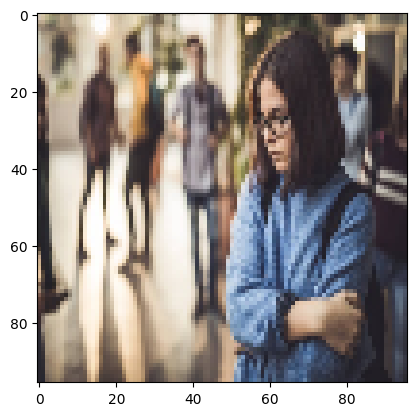

In [ ]:
test_image(560, imge_train,imge_trains,model)

1/1 [==============================] - 0s 31ms/step
Predicted  is NOT_CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


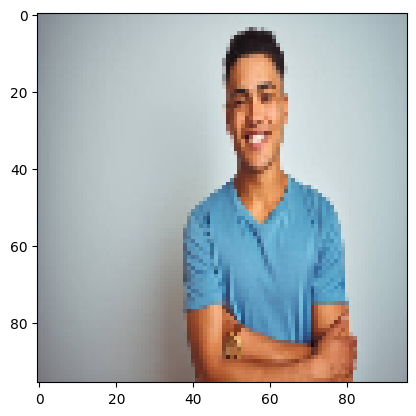

In [ ]:
test_image(670, imge_train,imge_trains,model)

1/1 [==============================] - 0s 49ms/step
Predicted  is NOT_CHILD


<ipython-input-48-1b2744d6d445>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


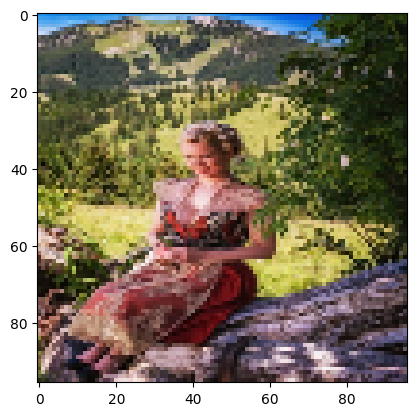

In [ ]:
test_image(490 ,imge_train,imge_trains,model)